In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(w, u, v):
    # Compute shift term for log-sum-exp trick
    us, vs = ((w@u)**2), ((w@v)**2)
    shift = max(us, vs)
    # Compute function value using log-sum-exp trick
    return shift + np.log(np.exp((w@u)**2 - shift) + np.exp((w@v)**2 - shift)) - vs

def g(w, u, v):
    # Compute shift term for exp-normalize trick
    us, vs = ((w@u)**2), ((w@v)**2)
    shift = max(us, vs)
    # Compute gradient numerator with exp-normalize
    t = 2*(np.exp((w@u)**2 - shift)*np.outer(u, u) + np.exp((w@v)**2 - shift)*np.outer(v, v))@w
    # Compute gradient denominator with exp-normalize
    b = np.exp((w@u)**2 - shift) + np.exp((w@v)**2 - shift)
    # Final term is numerator / denominator
    return (t / b) - 2*(np.outer(v, v)@w)

def ag(w, u, v, a):
    # Compute shift term for exp-normalize trick
    us, vs = ((w@u)**2) + np.log(a), ((w@v)**2) + np.log(a)
    shift = max(us, vs)
    # Compute gradient numerator with exp-normalize
    t = 2*(np.exp((w@u)**2 + np.log(a) - shift)*np.outer(u, u) + np.exp((w@v)**2 + np.log(a) - shift)*np.outer(v, v))@w
    # Compute gradient denominator with exp-normalize
    b = np.exp((w@u)**2 - shift) + np.exp((w@v)**2 - shift)
    # Final term is numerator / denominator
    return (t / b)  - 2*a*(np.outer(v, v)@w)

def h(w, u, v):
    raise NotImplemented
    t1 = 4*(np.exp((w@u)**2)*((w@u)**2)*np.outer(u, u) + np.exp((w@v)**2)*((w@v)**2)*np.outer(v, v))
    b1 = np.exp((w@u)**2) + np.exp((w@v)**2)
    t2 = 4*np.exp((w@u)**2)*np.outer(u, u)@np.outer(w, w)@(np.exp((w@u)**2)*np.outer(u, u)).T
    b2 = (np.exp((w@u)**2) + np.exp((w@v)**2))**2
    return (t1 / b1) - (t2 / b2)

f_min = 0.0

[-0.11808053  0.65302782] [0.45232694 0.28823324]
eig: [-3.  3.]
0.0032453009285520196 0.0 0.0 0.0
[ 4.11154675e+00 -1.11022302e-16] [ 4.11154675e+00 -1.11022302e-16]
[-0.11808053  0.65302782] [0.45232694 0.28823324]
eig: [ 6.0000000e+00 -8.8817842e-16]
0.6931471805599453 2.4093271921039583 0.6931471805599453 0.6931471805599453
[ 0.43119037 -0.43119037] [ 0.43119037 -0.43119037]
[-0.11808053  0.65302782] [0.45232694 0.28823324]
eig: [-4.4408921e-16 -6.0000000e+00]
0.002856750067694591 0.0 0.0 0.0
[2.2107454  2.85861321] [nan nan]


/home/luke/software/anaconda3/envs/cs288/lib/python3.6/site-packages/ipykernel_launcher.py:80: RuntimeWarning: divide by zero encountered in double_scalars
/home/luke/software/anaconda3/envs/cs288/lib/python3.6/site-packages/ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in multiply


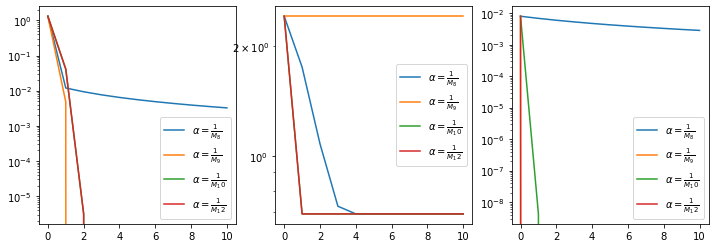

In [945]:
def M1(w, u, v):
    return 4*( ((w@u)**2)*(u@u) + ((w@v)**2)*(v@v) )

def M2(w, u, v):
    return 4*(w@w) + 2*(u@u)

def M3(w, u, v):
    A = np.outer(u, u) - np.outer(v, v)
    U, S, V = np.linalg.svd(A)
    s = max(S)
    return 4*(w@w)*(s**2) + 2*s

def M4(w, u, v):
    return 4*(w@w)*((u@u)**2)*((v@v)**2) + 2*(u@u)

def M5(w, u, v):
    return 4*(w@w)*((u@u)**2 + (v@v)**2 - 2*((u@v)**2)) + 2*(u@u - v@v)

def M6(w, u, v):
    A = np.outer(u, u) - np.outer(v, v)
    U, S, V = np.linalg.svd(A)
    s = max(S)
    return 2*s

def M7(w, u, b):
    A = np.outer(u, u) - np.outer(v, v)
    U, S, V = np.linalg.svd(A)
    s = max(S)
    return (w@w)*(s**2) + 2*s

def M8(w, u, b):
    A = np.outer(u, u) - np.outer(v, v)
    return np.linalg.norm(A, ord=2)

def M9(w, u, b):
    t = np.exp((w@u)**2 - (w@v)**2)
    b = t + 1
    p = t / b
    
    A = np.outer(u, u) - np.outer(v, v)
    return p*np.linalg.norm(A, ord=2)

def M10(w, u, b):
    t = np.exp((w@u)**2 - (w@v)**2)
    b = t + 1
    p = t / b
    
    A = np.outer(u, u) - np.outer(v, v)
    return 2*p*np.linalg.norm(A, ord=2)

def M11(w, u, b):
    t = np.exp((w@u)**2 - (w@v)**2)
    b = t + 1
    p = t / b
    
    A = np.outer(u, u) - np.outer(v, v)
    top = 2*p*w.T@A@A@A@w
    bot = w.T@A@A@w
    return top / bot 

def M12(w, u, b):
    t = np.exp((w@u)**2 - (w@v)**2)
    b = t + 1
    p = t / b
    
    
    A = np.outer(u, u) - np.outer(v, v)
    L = np.linalg.eigvals(A)
    
    return 2*p*max(L)

def iter_descent(w0, u, v, M, num_iter=10):
    w = w0
    t_list = [0]
    f_list = [f(w0, u, v) - f_min]
    for t in range(1, num_iter+1):
        # Compute smoothness
        Mt = M(w, u, v)
        # Set learning rate
        a = 1 / Mt
        #a = 1/t
        # Take gradient step
        wn = w - a*g(w, u, v)
        # Take stabilized gradient step
        #wn = w - ag(w, u, v, a)
        # Store results
        t_list.append(t)
        f_list.append(f(wn, u, v) - f_min)
        w = wn
        
    return t_list, f_list, w

# for d=2: 1 looks nice, 3, 6, 14(longest) take long to converge!, 
np.random.seed(14)

# Set dimension
d = 2

fig, ax_arr, = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i in range(3):
    # Initialize weights
    w0 = np.random.rand(d)
    #w0 = np.zeros(d)

    # Initialize data
    #x, y, z = np.random.rand(3, d)
    u = x - y
    v = x - z
    print(u, v)

    s = 0
    if i == 0:
        u = np.array([1, 2]) + s
        v = np.array([2, 1]) + s
    elif i == 1:
        u = np.array([2, 2]) + s
        v = np.array([1, 1]) + s
    elif i == 2:
        u = np.array([1, 1]) + s
        v = np.array([2, 2]) + s
    else:
        raise Exception
    print('eig:', np.linalg.eigvals(np.outer(u, u) - np.outer(v, v)))

    # Run gradient descent
    #t1_list, f1_list, w1 = gd(w0, u, v, M8)
    t2_list, f2_list, w2 = gd(w0, u, v, M9)
    t3_list, f3_list, w3 = gd(w0, u, v, M10)
    t4_list, f4_list, w4 = gd(w0, u, v, M12)
    print(min(f1_list), min(f2_list), min(f3_list), min(f4_list))
    print(w3, w4)

    # Filter after the point where it stops descending
    if False:
        ft1_list, ff1_list = [], []
        for t, f1, f2 in zip(t1_list, f1_list[:-1], f1_list[1:]):
            if f2 <= f1:
                ft1_list.append(t)
                ff1_list.append(f1)
            else:
                break
        t1_list, f1_list = ft1_list, ff1_list

    # Plot results

    #ax_arr[i].plot(t1_list, f1_list, label=r'$\alpha = \frac{1}{M_8}$')
    ax_arr[i].plot(t2_list, f2_list, label=r'$\alpha = \frac{1}{M_9}$')
    ax_arr[i].plot(t3_list, f3_list, label=r'$\alpha = \frac{1}{M_10}$')
    ax_arr[i].plot(t4_list, f4_list, label=r'$\alpha = \frac{1}{M_12}$')

    ax_arr[i].set_yscale('log')
    ax_arr[i].legend()
plt.show()

In [81]:
diff1_list = []
diff2_list = []
for i in range(10000):
    u, v = np.random.rand(2, 10)
    A = np.outer(u, u) - np.outer(v, v)
    eigval, eigvec = np.linalg.eig(A)
    eig = eigval.real
    top = eig[abs(eig) > 1e-8]
    ub1 = (u@u) - (v@v)
    ub2 = (u@u)
    #print(ub1, max(top))
    diff1_list.append(ub1 - max(top))
    diff2_list.append(ub2 - max(top))
    
print(min(diff1_list), max(diff1_list))
print(min(diff2_list), max(diff2_list))

-6.023368723683567 -0.1651894886275107
0.05862893475982456 3.6359600744240277


0.010000049883798188 inf


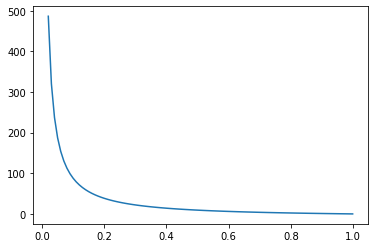

In [934]:
#x = np.linspace(0, 1, 100)
#y = x*(1-x)
#plt.plot(x, y)

#x = np.linspace(0, 1, 100)
#y = x*(x - 1)
#plt.plot(x, y)

#x = np.linspace(0, 1, 100)
#y = x*(x - 2)
#plt.plot(x, y)

#x = np.linspace(0, 1, 100)
#y = (1-x)/x
#plt.plot(x, y)

n = 10

x = np.linspace(0.01, 0.999, 100)
y = np.log(x*np.exp(((1-x)/x)*n) + (1-x))
print(min(y), max(y))
plt.plot(x, y)

plt.show()

### Final Smoothness Test

In [126]:
# Upper bound test for new M
def H(w, u, v):
    #
    A = np.outer(u, u) - np.outer(v, v)
    B = np.outer(w, w)
    #
    t = np.exp((w@u)**2 - (w@v)**2)
    b = t + 1
    p = t / b
    #
    return 4*p*((1-p)*A@B@A) + 2*p*A

# Speculative... can't prove it
def M(w, u, b):
    A = np.outer(u, u) - np.outer(v, v)
    U, S, V = np.linalg.svd(A)
    s = max(S)
    return (w@w)*(s**2) + s

diff1_list = []
diff2_list = []
for i in range(10000):
    w, u, v, z = np.random.rand(4, 10)
    h = z.T@H(w, u, v)@z
    ub1 = M7(w, u, v)*(z@z)
    ub2 = M6(w, u, v)*(z@z)
    diff1_list.append(ub1 - h)
    diff2_list.append(ub2 - h)

print(min(diff1_list), max(diff1_list))
print(min(diff2_list), max(diff2_list))

4.548907072218869 774.9986521852302
-15.195441762729537 51.2070083989452


### Descent LR Test

In [ ]:
diff1_list = []
#diff2_list = []
for i in range(10000):
    w, u, v, z = np.random.rand(4, 10)
    h = z.T@H(w, u, v)@z
    ub1 = M7(w, u, v)*(z@z)
    ub2 = M6(w, u, v)*(z@z)
    diff1_list.append(ub1 - h)
    #diff2_list.append(ub2 - h)

print(min(diff1_list), max(diff1_list))
#print(min(diff2_list), max(diff2_list))

In [298]:
diff1_list = []
#diff2_list = []
d = 1
for i in range(10):
    # Initialize data
    u, v = np.random.rand(2, d)
    # 
    A = np.outer(u, u) - np.outer(v, v)    
    U, S, V = np.linalg.svd(A)
    s_min, s_max = min(S), max(S)
    L, _ = np.linalg.eig(A)
    l_min, l_max = min(L.real), max(L.real)
    
    L2, _ = np.linalg.eig(A@A)
    l2_min, l2_max = min(L2.real), max(L2.real)
    #print(l2_max, s_max**2, l_max**2)
    
    #eig = eigval.real
    #top = eig[abs(eig) > 1e-8]
    #s_min = min(top)
    #s_max = max(top)
    alpha1 = 1 / l_min
    #
    B1 = np.eye(d) - 2*alpha1*A
    eigval1, eigvec1 = np.linalg.eig(B1@B1)
    l_max1 = max(eigval1.real)

    #
    #print(l_max, s_max)
    #alpha2 = 1 / l_min - np.sign(l_max)*0.1
    #print(l_min, l_max)
    alpha2 = 1 / l_min
    #
    B2 = np.eye(d) + 4*(alpha2**2)*(A@A) - 4*alpha2*A
    #B2 = np.eye(d) - 2*alpha1*A
    U1, S1, V1 = np.linalg.svd(4*(alpha2**2)*(A@A))
    U2, S2, V2 = np.linalg.svd(4*alpha2*A)
    
    eigval2, eigvec2 = np.linalg.eig(B2)
    l_max2 = max(eigval2.real)
    print(1, max(S1), max(S2), l_max2)
    #print(l_max1, l_max2)
    #diff1_list.append(ub1 - max(top))
    #diff2_list.append(ub2 - max(top))
    
#print(min(diff1_list), max(diff1_list))
#print(min(diff2_list), max(diff2_list))

[[0.]]
1 4.0 4.0 1.0
[[0.]]
1 4.0 4.0 1.0
[[0.]]
1 3.9999999999999996 4.0 1.0
[[0.]]
1 4.0 4.0 1.0
[[0.]]
1 3.9999999999999996 4.0 1.0
[[-8.8817842e-16]]
1 4.000000000000001 4.0 1.0000000000000009
[[-8.8817842e-16]]
1 4.000000000000001 4.0 1.0000000000000009
[[0.]]
1 4.0 4.0 1.0
[[0.]]
1 3.9999999999999996 4.0 1.0
[[0.]]
1 3.9999999999999996 4.0 1.0


In [351]:
diff1_list = []
#diff2_list = []
d = 10
w, u, v = np.random.rand(3, d)

t = np.exp((w@u)**2 - (w@v)**2)
b = t + 1
p = t / b

# 
A = np.outer(u, u) - np.outer(v, v)    
U, S, V = np.linalg.svd(A)
s_min, s_max = min(S), max(S)
L, _ = np.linalg.eig(A)
l_min, l_max = min(L.real), max(L.real)

L2, _ = np.linalg.eig(A@A)
l2_min, l2_max = min(L2.real), max(L2.real)

for alpha2 in np.logspace(-10, 1, 1000):

    # Initialize data
    
    B1 = np.eye(d) - 2*alpha2*A
    eigval1, eigvec1 = np.linalg.eig(B1@B1)
    l_max1 = max(eigval1.real)

    B2 = 4*(alpha2**2)*(A@A) - 4*alpha2*A
    eigval2, eigvec2 = np.linalg.eig(B2)
    l_max2 = max(eigval2.real)
    
    diff1_list.append(l_max1)
    diff2_list.append(l_max2)
    
print(min(diff1_list), max(diff1_list))
print(min(diff2_list), max(diff2_list))

1.0000000006944056 1552.4412649958233
-15.195441762729537 3.066825470059507e+21


In [340]:
np.logspace?

In [366]:
trial_list = []
for trial in range(1000):

    diff1_list = []

    d = 10
    w, u, v = np.random.rand(3, d)

    t = np.exp((w@u)**2 - (w@v)**2)
    b = t + 1
    p = t / b

    # 
    A = np.outer(u, u) - np.outer(v, v)    
    U, S, V = np.linalg.svd(A)
    s_min, s_max = min(S), max(S)
    L, _ = np.linalg.eig(A)
    l_min, l_max = min(L.real), max(L.real)

    L2, _ = np.linalg.eig(A@A)
    l2_min, l2_max = min(L2.real), max(L2.real)

    term1 = w.T@A@w

    for alpha in np.logspace(-1, 1, 100):

        # Initialize data
        B = np.eye(d) - 2*p*alpha*A
        term2 = w.T@B@A@B@w

        diff1_list.append(term2 - term1)

    #print(min(diff1_list), max(diff1_list))
    trial_list.append(min(diff1_list))
    
print(max(trial_list))

-0.00091855669838381


In [373]:
trial_list = []
for trial in range(100):

    diff1_list = []

    d = 10
    w, u, v = np.random.rand(3, d)

    t = np.exp((w@u)**2 - (w@v)**2)
    b = t + 1
    p = t / b

    # 
    A = np.outer(u, u) - np.outer(v, v)    
    U, S, V = np.linalg.svd(A)
    s_min, s_max = min(S), max(S)
    L, _ = np.linalg.eig(A)
    l_min, l_max = min(L.real), max(L.real)

    L2, _ = np.linalg.eig(A@A)
    l2_min, l2_max = min(L2.real), max(L2.real)

    term1 = w@w*np.linalg.norm(A, ord=2)

    for alpha in np.logspace(-1, 1, 100):

        # Initialize data
        B = np.eye(d) - 2*p*alpha*A
        term2 = (w@w)*(np.linalg.norm(B, ord=2)**2)*np.linalg.norm(A, ord=2)

        diff1_list.append(term2 - term1)

    #print(min(diff1_list), max(diff1_list))
    trial_list.append(min(diff1_list))
    
print(min(trial_list), max(trial_list))

3.4045587682385303e-07 25.749939270081853


In [394]:
trial_list = []
for trial in range(100):

    diff1_list = []

    d = 10
    w, u, v = np.random.rand(3, d)

    t = np.exp((w@u)**2 - (w@v)**2)
    b = t + 1
    p = t / b

    # 
    A = np.outer(u, u) - np.outer(v, v)    
    U, S, V = np.linalg.svd(A)
    s_min, s_max = min(S), max(S)
    L, _ = np.linalg.eig(A)
    l_min, l_max = min(L.real), max(L.real)

    L2, _ = np.linalg.eig(A@A)
    l2_min, l2_max = min(L2.real), max(L2.real)

    term1 = 1/4

    for alpha in np.logspace(-3, 3, 100):

        # Initialize data
        B = np.eye(d) - 2*p*alpha*A
        a = np.linalg.norm(A, ord=2)
        term2 = (w@w)*((alpha**2)*(p**2)*(a**3) - alpha*p*(a**2))

        diff1_list.append(term2 - term1)

    #print(min(diff1_list), max(diff1_list))
    trial_list.append(min(diff1_list))
    
print(max(trial_list))

-0.34209503300797717


In [414]:
trial_list = []
for trial in range(1000):

    diff1_list = []

    d = 10
    w, u, v = np.random.rand(3, d)

    t = np.exp((w@u)**2 - (w@v)**2)
    b = t + 1
    p = t / b

    # 
    A = np.outer(u, u) - np.outer(v, v)    
    U, S, V = np.linalg.svd(A)
    s_min, s_max = min(S), max(S)
    L, _ = np.linalg.eig(A)
    l_min, l_max = min(L.real), max(L.real)

    L2, _ = np.linalg.eig(A@A)
    l2_min, l2_max = min(L2.real), max(L2.real)

    term1 = w.T@A@w

    #a = np.linalg.norm(A, ord=2)
    #alpha = 1 / (p*a)
    
    #alpha_top = w.T@A@A@w
    #alpha_bot = p*w.T@A@A@A@w
    #alpha = alpha_top / alpha_bot
    #print(alpha)

    # Initialize data
    B = np.eye(d) - 2*p*alpha*A
    term2 = w.T@B@A@B@w

    diff = term2 - term1

    #print(min(diff1_list), max(diff1_list))
    trial_list.append(diff)
    
print(min(trial_list), max(trial_list))

-4487.716002512195 -0.00023616111106050663


In [562]:
print(w.T@A@w)
print(np.linalg.norm(A, ord=2))
print((w.T@A@A@A@w) / (w.T@A@A@w))

2.6654988974718443
3.1506341195051455
0.2544253493052264


In [921]:
np.random.seed(0)

l_list = []
b_list = []
c_list = []
s_list = []
diff_list = []
for trial in range(1000):

    diff1_list = []

    d = 10
    w, u, v = np.random.rand(3, d)

    t = np.exp((w@u)**2 - (w@v)**2)
    b = t + 1
    p = t / b

    # 
    A = np.outer(u, u) - np.outer(v, v) 
    s = np.linalg.norm(A, 2)
    L = np.linalg.eigvals(A).real
    l = min(L)
    l_max = max(L)
    
    L_bad = ((L**3) / (l_max**2)) - 2*((L**2) / l_max)
    l_bad = max(L_bad)
    l_list.append(l_bad)
    #print(l_bad)
    #print(s, l_max)
    
    alpha = 1 / (2*p*(l_max**2))
    term1 = (alpha**2)*(p**2)*(w.T@A@A@A@w)
    term2 = alpha*p*(w.T@A@A@w)
    
    #print(term1, term2)
    b = term1 - term2
    #print(term + s)
    #ub = w.T@np.diag(L_bad)@w
    ub = (w@w) * l_bad
    
    c = np.log(p*np.exp(b) + (1-p))
    #ub = np.log(1 / (np.exp(-s) + 1))
    
    b_list.append(b)
    c_list.append(c)
    s_list.append(s)
    
    diff_list.append(b - ub)
    
#print(np.mean(b_list))
print(np.min(l_list), np.max(l_list))
print(np.min(b_list), np.max(b_list))
print(np.mean(c_list))
#print(np.mean(s_list))
print(min(c_list), max(c_list))
print(min(diff_list), max(diff_list))

-3.8052789784909205e-33 0.0
-1411.9732914633753 -0.15871692925063802
-0.44335196139632704
-1.9186625090970943 -1.4669639868588701e-07
-1411.9732914633753 -0.15871692925063802


### Does the norm of the iterate itself decrease?

In [ ]:
np.random.seed(0)

diff_list = []
for trial in range(100000):
    d = 10
    w, u, v = np.random.rand(3, d)

    t = np.exp((w@u)**2 - (w@v)**2)
    b = t + 1
    p = t / b

    # 
    A = np.outer(u, u) - np.outer(v, v) 
    s = np.linalg.norm(A, 2)
    
    alpha = 1 / s
    
    w_t = w
    n_t = np.linalg.norm(w_t)
    
    w_t1 = (np.eye(d) - 2*alpha*p*A)@w_t 
    n_t1 = np.linalg.norm(w_t1)
    
    ub = np.linalg.norm((np.eye(d) - 2*alpha*A), ord='fro')
    
    diff = n_t1 - n_t*ub
    
    diff_list.append(diff)
    
print(min(diff_list), max(diff_list))


In [709]:
np.random.seed(0)

diff_list = []
for trial in range(10000):
    d = 10
    w, u, v = np.random.rand(3, d)
    B = np.outer(u, u) - np.outer(v, v)
    
    t = np.exp((w@u)**2 - (w@v)**2)
    b = t + 1
    p = t / b
    
    q = p*(1-p)
    
    C = ((w@u)**2)*np.outer(u, u) + ((w@v)**2)*np.outer(v, v) - 2*(w@u)*(w@v)*(np.outer(u, v) + np.outer(v, u))

    term1 = 4*(w@w) * ((u@u)**2 + (v@v)**2)
    term2 = (w@w) * ((u@u)**2 + (v@v)**2 + 4*(u@u)*(v@v))
    term3 = (w@w) * np.linalg.norm(B, ord=2)**2 + np.linalg.norm(B, ord=2)
    term4 = np.linalg.norm(C, ord=2)
    
    diff = term3 - term4
    
    diff_list.append(diff)
    
print(min(diff_list), max(diff_list))

-199.37474089578592 75.6135905120264


In [724]:
np.random.seed(0)

diff_list = []
q_list = []
for trial in range(10000):
    d = 100
    w, u, v = np.random.rand(3, d)
    B = np.outer(u, u) - np.outer(v, v)
    
    t = np.exp((w@u)**2 - (w@v)**2)
    b = t + 1
    p = t / b
    
    q = p*(p-1)
    q_list.append(q)
    
    s = np.linalg.norm(B, ord=2)
    
    diff_list.append(4*s*q)
    
print(np.mean(diff_list))
print(min(diff_list), max(diff_list))
print(np.min(q_list), np.mean(q_list), np.max(q_list))

-0.3300623396909542
-26.743390345995856 0.0
-0.24999829705240567 -0.0036609390912881886 0.0


### Descent iterate bound

In [ ]:
np.random.seed(0)

diff_list = []
q_list = []
for trial in range(10000):
    d = 100
    w, u, v = np.random.rand(3, d)
    B = np.outer(u, u) - np.outer(v, v)
    
    t = np.exp((w@u)**2 - (w@v)**2)
    b = t + 1
    p = t / b
    
    q = p*(p-1)
    q_list.append(q)
    
    s = np.linalg.norm(B, ord=2)
    
    diff_list.append(4*s*q)
    
print(np.mean(diff_list))
print(min(diff_list), max(diff_list))
print(np.min(q_list), np.mean(q_list), np.max(q_list))